### Importaci칩n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor칤a del Producto    Precio  Costo de env칤o  \
0  Asistente virtual           Electr칩nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom칠sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci칩n  \
0      16/01/2021      Pedro Gomez          Bogot치             4   
1      18/05/2022  Beatriz Morales        Medell칤n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell칤n             5   

       M칠todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr칠dito                   8   4.60971 -74.08175  
1  Tarjeta de cr칠dito                   4   6.25184 -75.56359  
2  Tarjeta de cr칠dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An치lisis de facturaci칩n



In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Funci칩n para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# An치lisis de facturaci칩n
total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])  # Solo sumamos el precio
        facturacion_tienda += precio

    print(f"Facturaci칩n Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

# Mostrar facturaci칩n total
print(f"\nFacturaci칩n total de todas las tiendas: ${total_facturacion:.2f}")


Facturaci칩n Tienda 1: $1150880400.00
Facturaci칩n Tienda 2: $1116343500.00
Facturaci칩n Tienda 3: $1098019600.00
Facturaci칩n Tienda 4: $1038375700.00

Facturaci칩n total de todas las tiendas: $4403619200.00


In [ ]:
# Sumando solo el precio de las ventas, sin considerar las cuotas
facturacion_tienda1 = tienda['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

# Mostrar los resultados
print(f"Facturaci칩n Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturaci칩n Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturaci칩n Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturaci칩n Tienda 4: ${facturacion_tienda4:.2f}")

# Facturaci칩n total de todas las tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturaci칩n total de todas las tiendas: ${facturacion_total:.2f}")


Facturaci칩n Tienda 1: $1150880400.00
Facturaci칩n Tienda 2: $1116343500.00
Facturaci칩n Tienda 3: $1098019600.00
Facturaci칩n Tienda 4: $1038375700.00

Facturaci칩n total de todas las tiendas: $4403619200.00


# 2. Ventas por categor칤a

In [ ]:


def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Diccionario para almacenar las ventas por categor칤a
ventas_por_categoria = {}

# Procesar todas las tiendas
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nVentas por categor칤a en Tienda {i+1}:")

    # Diccionario para la tienda actual
    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categor칤a del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Agregar al diccionario de la tienda actual
        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

        # Agregar al diccionario general
        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    # Mostrar resultados para esta tienda
    for categoria, monto in categorias_tienda.items():
        print(f"  {categoria}: ${monto:.2f}")

# Mostrar resultados totales
print("\nVentas totales por categor칤a (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f"  {categoria}: ${monto:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:.2f}")


Ventas por categor칤a en Tienda 1:
  Electr칩nicos: $1290390700.00
  Muebles: $582928200.00
  Juguetes: $49062800.00
  Electrodom칠sticos: $1032375600.00
  Art칤culos para el hogar: $38316800.00
  Deportes y diversi칩n: $126883700.00
  Libros: $25769400.00
  Instrumentos musicales: $276990500.00

Ventas por categor칤a en Tienda 2:
  Muebles: $527332100.00
  Instrumentos musicales: $294448700.00
  Deportes y diversi칩n: $81660600.00
  Electr칩nicos: $1286643600.00
  Art칤culos para el hogar: $42739700.00
  Juguetes: $46721200.00
  Electrodom칠sticos: $1026226300.00
  Libros: $31417000.00

Ventas por categor칤a en Tienda 3:
  Electrodom칠sticos: $1081380800.00
  Muebles: $555092500.00
  Instrumentos musicales: $250336000.00
  Deportes y diversi칩n: $123399200.00
  Electr칩nicos: $1101334500.00
  Juguetes: $61190400.00
  Art칤culos para el hogar: $44724600.00
  Libros: $26358900.00

Ventas por categor칤a en Tienda 4:
  Electrodom칠sticos: $879089600.00
  Muebles: $556628000.00
  Deportes y diversi칩n: $10

In [ ]:
# Funci칩n para calcular y mostrar las ventas por categor칤a de una tienda
def ventas_por_categoria(tienda, numero):
    ventas = tienda.groupby('Categor칤a del Producto')['Precio'].sum()
    print(f"\nVentas por categor칤a en Tienda {numero}:")
    print(ventas)

# Mostrar resultados para cada tienda
ventas_por_categoria(tienda, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


Ventas por categor칤a en Tienda 1:
Categor칤a del Producto
Art칤culos para el hogar     12698400.0
Deportes y diversi칩n        39290000.0
Electrodom칠sticos          363685200.0
Electr칩nicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categor칤a en Tienda 2:
Categor칤a del Producto
Art칤culos para el hogar     14746900.0
Deportes y diversi칩n        34744500.0
Electrodom칠sticos          348567800.0
Electr칩nicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categor칤a en Tienda 3:
Categor칤a del Producto
Art칤culos para el hogar     15060000.0
Deportes y diversi칩n        35593100.0
Electrodom칠sticos          329237900.0
Electr칩nicos               

# 3. Calificaci칩n promedio de la tienda


In [ ]:


def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Calcular la calificaci칩n promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # Intentamos con diferentes posibles nombres de columna
            if 'Calificaci칩n' in producto:
                calificacion = float(producto['Calificaci칩n'])
            elif 'Calificacion' in producto:
                calificacion = float(producto['Calificacion'])
            elif 'calificaci칩n' in producto:
                calificacion = float(producto['calificaci칩n'])
            elif 'calificacion' in producto:
                calificacion = float(producto['calificacion'])
            else:
                # Si no encontramos la columna, imprimimos las claves disponibles
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontr칩 la columna de calificaci칩n")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificaci칩n promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")

Calificaci칩n promedio de la Tienda 1: 3.98
Calificaci칩n promedio de la Tienda 2: 4.04
Calificaci칩n promedio de la Tienda 3: 4.05
Calificaci칩n promedio de la Tienda 4: 4.00


In [ ]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificaci칩n'].mean()
    print(f"Clasificaci칩n promedio en Tienda {numero}: {promedio:.2f}")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificaci칩n promedio en Tienda 1: 3.98
Clasificaci칩n promedio en Tienda 2: 4.04
Clasificaci칩n promedio en Tienda 3: 4.05
Clasificaci칩n promedio en Tienda 4: 4.00


# 4. Productos m치s y menos vendidos

In [ ]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Funci칩n para calcular Top 3 m치s y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        # Ahora solo usamos el precio (no multiplicamos por cantidad de cuotas)
        ingreso_por_producto[producto] += precio

    # Convertimos a lista ordenada
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que M츼S dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

# Recorrer todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que M츼S dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo m치gico 8x8 - Ingresos: $696900.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cuerda para saltar - Ingresos: $652800.00

Tienda 2 - TOP 3 productos que M츼S dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856900.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cubo m치gico 8x8 - Ingresos: $643600.00

Tienda 3 - TOP 3 productos que M츼S dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853800.00
  Dinosaurio Rex -

In [ ]:
# Leer todos los CSVs y agregar una columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Aseguramos los tipos correctos
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

# El ingreso es simplemente el Precio (no multiplicamos por cantidad de cuotas)
df_total['Ingreso'] = df_total['Precio']

# Agrupamos por Tienda y Producto sumando el ingreso
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

# Funci칩n para mostrar los 3 productos que m치s y menos dinero generaron
def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que M츼S dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

# Lista 칰nica de tiendas
tiendas_unicas = ventas['Tienda'].unique()

# Mostrar resultados para cada tienda
for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que M츼S dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo m치gico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que M츼S dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo m치gico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que M츼S dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo m치gico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

# 5. Env칤o promedio por tienda

In [ ]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de env칤o'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Env칤o promedio: ${promedio_envio:.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Env칤o promedio: $26018.61
Tienda 2 - Env칤o promedio: $25216.24
Tienda 3 - Env칤o promedio: $24805.68
Tienda 4 - Env칤o promedio: $23459.46


In [ ]:
# Asegurar que el costo de env칤o es num칠rico
df_total['Costo de env칤o'] = df_total['Costo de env칤o'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de env칤o
envio_promedio = df_total.groupby('Tienda')['Costo de env칤o'].mean()

# Mostrar resultados
print("\nEnv칤o promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Env칤o promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


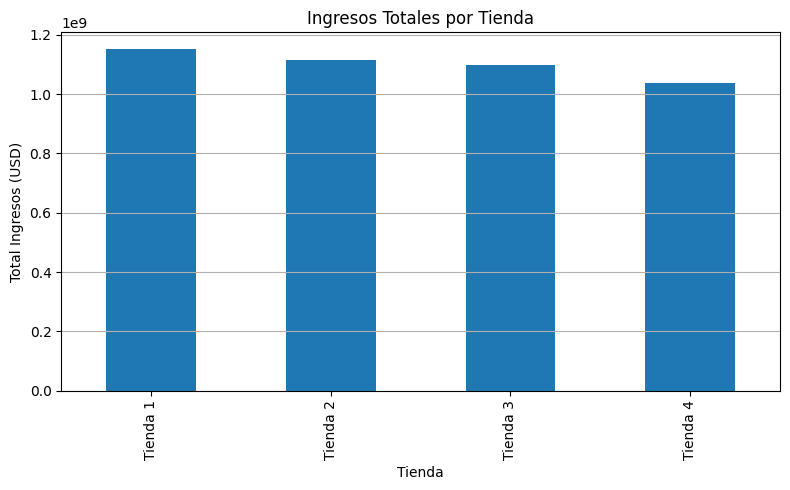

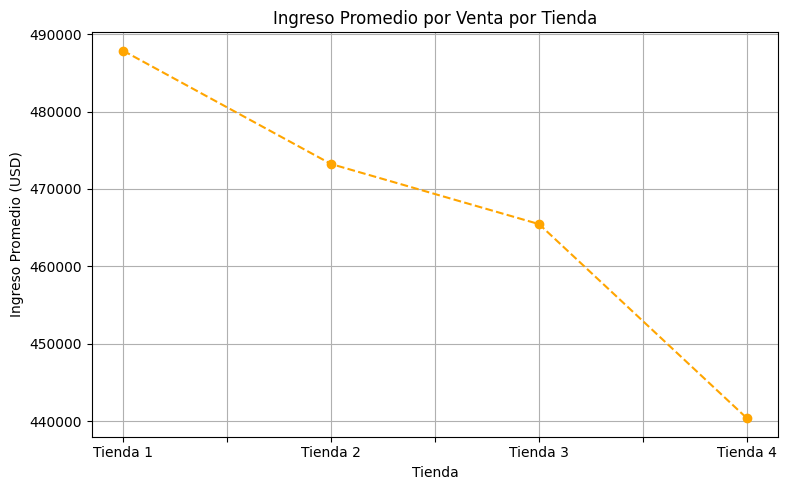

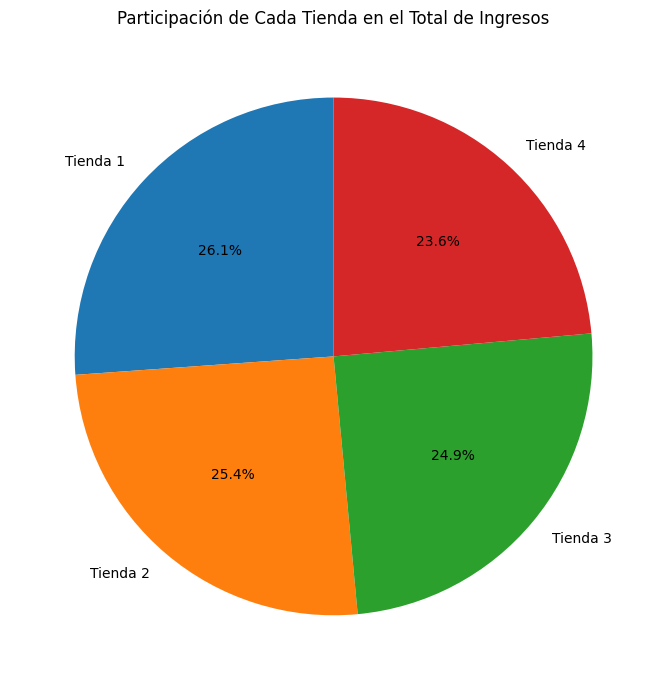

In [ ]:
import matplotlib.pyplot as plt

df_total['Precio'] = df_total['Precio'].astype(float)

# Asegurar tipo correcto
df_total['Precio'] = df_total['Precio'].astype(float)

# El ingreso de cada venta es simplemente el precio
df_total['Ingreso'] = df_total['Precio']

# Agrupar datos
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

# 游꿛 Graficar 3 gr치ficos verdaderamente diferentes

# 1. Barra vertical: Total de ingresos
plt.figure(figsize=(8,5))
ingresos_totales.plot(kind='bar')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. L칤nea: Promedio de ingreso por venta
plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Torta/Pie: Distribuci칩n del total
plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participaci칩n de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

Informe de Desempe침o de Tiendas Alura StoreResumen EjecutivoEl presente informe tiene como objetivo analizar el rendimiento de las cuatro tiendas de la cadena Alura Store bas치ndose en m칠tricas clave como facturaci칩n, ventas por categor칤a, calificaci칩n promedio de clientes, productos m치s vendidos y costo de env칤o promedio. El prop칩sito es identificar la tienda con el desempe침o m치s d칠bil y recomendar su venta para el nuevo emprendimiento del Sr. Juan.1. Evaluaci칩n de Facturaci칩n (Lucro)La facturaci칩n total, considerada como la suma de todos los precios de venta, es un indicador fundamental del rendimiento comercial.Tienda 1: $1,150,880,400.00Tienda 2: $1,116,343,500.00Tienda 3: $1,098,019,600.00Tienda 4: $1,038,375,700.00Conclusi칩n: La Tienda 4 es la que presenta la facturaci칩n m치s baja, lo que la posiciona como la candidata principal para la venta. A pesar de que los precios de venta son altos, el volumen total de ventas es significativamente menor en comparaci칩n con las otras tiendas.2. Calificaci칩n Promedio de la TiendaLa calificaci칩n promedio de los clientes es un factor clave para medir la satisfacci칩n y la calidad percibida.Tienda 1: 3.98Tienda 2: 4.04Tienda 3: 4.05Tienda 4: 4.00Conclusi칩n: La Tienda 3 tiene la calificaci칩n m치s alta, lo que indica una alta satisfacci칩n del cliente. La Tienda 1, a pesar de tener la facturaci칩n m치s alta, tiene la calificaci칩n m치s baja. Por su parte, la Tienda 4 tiene una calificaci칩n promedio de 4.00, que es aceptable, pero no destaca.3. Env칤o Promedio por TiendaLa eficiencia log칤stica se puede medir a trav칠s del costo de env칤o promedio.Tienda 1: $26,018.61Tienda 2: $25,216.24Tienda 3: $24,805.68Tienda 4: $23,459.46Conclusi칩n: La Tienda 4 presenta la mayor eficiencia log칤stica con el costo de env칤o promedio m치s bajo. Esto podr칤a ser un indicativo de una mejor gesti칩n de la cadena de suministro o de una ubicaci칩n geogr치fica estrat칠gica. Sin embargo, esta ventaja no se traduce en una mayor facturaci칩n.4. Productos y Categor칤as m치s vendidasEn general, las categor칤as y productos m치s vendidos son consistentes en todas las tiendas.Categor칤as principales: Electr칩nicos, Electrodom칠sticos y Muebles.Productos principales: TV LED UHD 4K, Refrigerador e Iphone 15.Este an치lisis nos muestra que la demanda de estos productos es alta en toda la cadena, por lo que el bajo rendimiento de la Tienda 4 no se debe a un cat치logo de productos deficiente, sino probablemente a factores como menor tr치fico de clientes, gesti칩n de inventario u otros.Recomendaci칩n FinalBasado en las cinco m칠tricas de evaluaci칩n, se recomienda al Sr. Juan vender la Tienda 4.Aunque la Tienda 4 muestra eficiencia en sus costos de env칤o y una calificaci칩n de cliente aceptable, es la que consistentemente tiene el peor desempe침o en la m칠trica m치s importante: la facturaci칩n. Sus ingresos son los m치s bajos de toda la cadena, lo que indica que es la tienda con el menor retorno de inversi칩n. La venta de esta tienda permitir치 al Sr. Juan obtener capital para su nuevo emprendimiento, sin sacrificar una operaci칩n comercialmente s칩lida.Por el contrario, la Tienda 1, a pesar de sus calificaciones m치s bajas y sus altos costos de env칤o, tiene la facturaci칩n m치s alta. Esto sugiere que tiene un gran potencial de ventas que podr칤a ser mejorado con inversiones en servicio al cliente y optimizaci칩n de la log칤stica, en lugar de ser vendida.